<a href="https://colab.research.google.com/github/nguyendao21/Project_Two_Team_Hodl/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mprudd2/Project_Two_Team_Hodl.git

Cloning into 'Project_Two_Team_Hodl'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [3]:
import pandas as pd
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import numpy as np
from math import floor
from termcolor import colored as cl 

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [45]:
btc_df = pd.read_csv(
    Path("/content/Project_Two_Team_Hodl/Resources/Bitstamp_BTCUSD_d.csv"),
    index_col="date",
    infer_datetime_format=True,
    parse_dates=True
)



In [46]:
btc_df.head()

,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,
2022-03-17,BTC/USD,41142.76,41187.60,40961.35,41049.85,8.817627,3.619623e+05
2022-03-16,BTC/USD,39302.80,41693.97,38865.67,41142.76,5987.103889,2.463260e+08
2022-03-15,BTC/USD,39688.55,39896.13,38142.35,39302.70,1638.684030,6.440471e+07
2022-03-14,BTC/USD,37763.37,39913.42,37567.19,39665.71,1439.767682,5.710941e+07
2022-03-13,BTC/USD,38798.68,39312.50,37595.62,37790.54,737.880132,2.788489e+07


In [47]:
btc_df["actual returns"] = btc_df["close"].pct_change()
btc_df.head()

,symbol,open,high,low,close,Volume BTC,Volume USD,actual returns
date,,,,,,,,
2022-03-17,BTC/USD,41142.76,41187.60,40961.35,41049.85,8.817627,3.619623e+05,NaN
2022-03-16,BTC/USD,39302.80,41693.97,38865.67,41142.76,5987.103889,2.463260e+08,0.002263
2022-03-15,BTC/USD,39688.55,39896.13,38142.35,39302.70,1638.684030,6.440471e+07,-0.044724
2022-03-14,BTC/USD,37763.37,39913.42,37567.19,39665.71,1439.767682,5.710941e+07,0.009236
2022-03-13,BTC/USD,38798.68,39312.50,37595.62,37790.54,737.880132,2.788489e+07,-0.047274


In [48]:
btc_df = btc_df.dropna()

In [50]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

btc_df['rsi_14'] = get_rsi(btc_df['close'], 14)
btc_df = btc_df.dropna()
btc_df

,symbol,open,high,low,close,Volume BTC,Volume USD,actual returns,rsi_14
date,,,,,,,,,
2022-03-08,BTC/USD,38002.23,39377.00,37885.05,38753.65,1.864905e+03,72271860.69,-0.076415,47.367621
2022-03-07,BTC/USD,38404.97,39557.26,37169.52,38016.47,1.949697e+03,74120594.46,-0.019022,42.015581
2022-03-06,BTC/USD,39390.31,39701.00,38100.00,38438.89,1.194374e+03,45910400.57,0.011111,45.795063
2022-03-05,BTC/USD,39170.19,39620.30,38600.30,39416.79,8.069114e+02,31805858.33,0.025440,53.372131
2022-03-04,BTC/USD,42476.25,42540.57,38590.95,39175.56,2.493657e+03,97690426.28,-0.006120,51.461120
...,...,...,...,...,...,...,...,...,...
2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6832.53,0.006849,69.684687
2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6660.56,-0.002268,69.036895
2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3046.33,-0.013346,65.203802


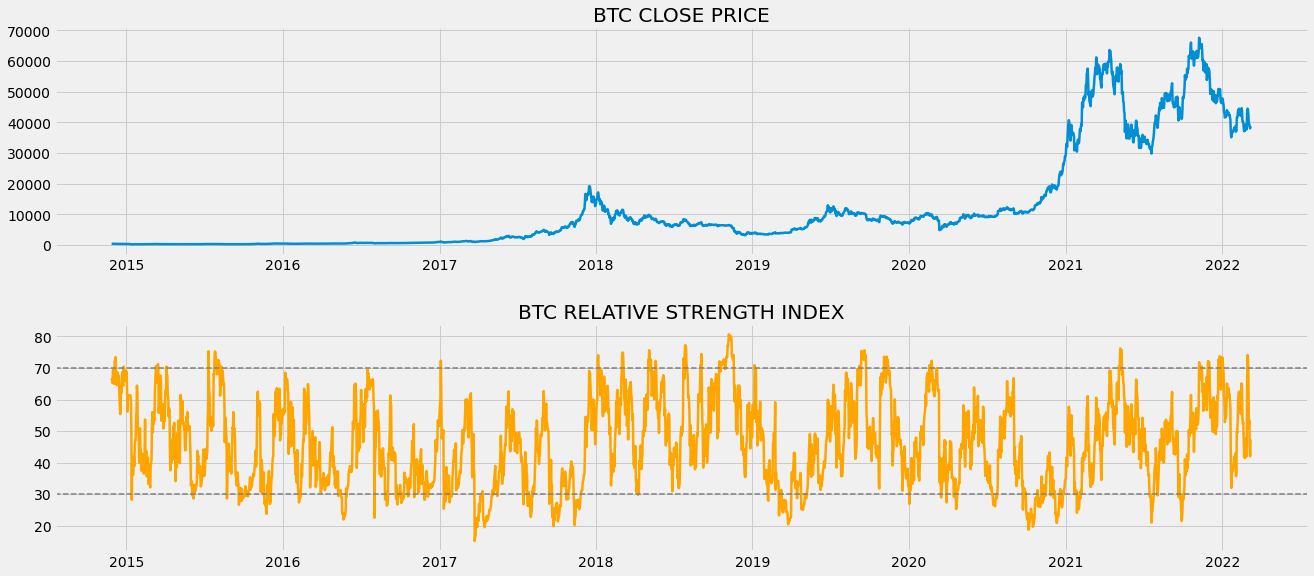

In [52]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(btc_df['close'], linewidth = 2.5)
ax1.set_title('BTC CLOSE PRICE')
ax2.plot(btc_df['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.set_title('BTC RELATIVE STRENGTH INDEX')
plt.show()

In [53]:
def implement_rsi_strategy(prices, rsi):    
    buy_price = []
    sell_price = []
    rsi_signal = []
    signal = 0

    for i in range(len(rsi)):
        if rsi[i-1] > 30 and rsi[i] < 30:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        elif rsi[i-1] < 70 and rsi[i] > 70:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                rsi_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0)
            
    return buy_price, sell_price, rsi_signal
            

buy_price, sell_price, rsi_signal = implement_rsi_strategy(btc_df['close'], btc_df['rsi_14'])

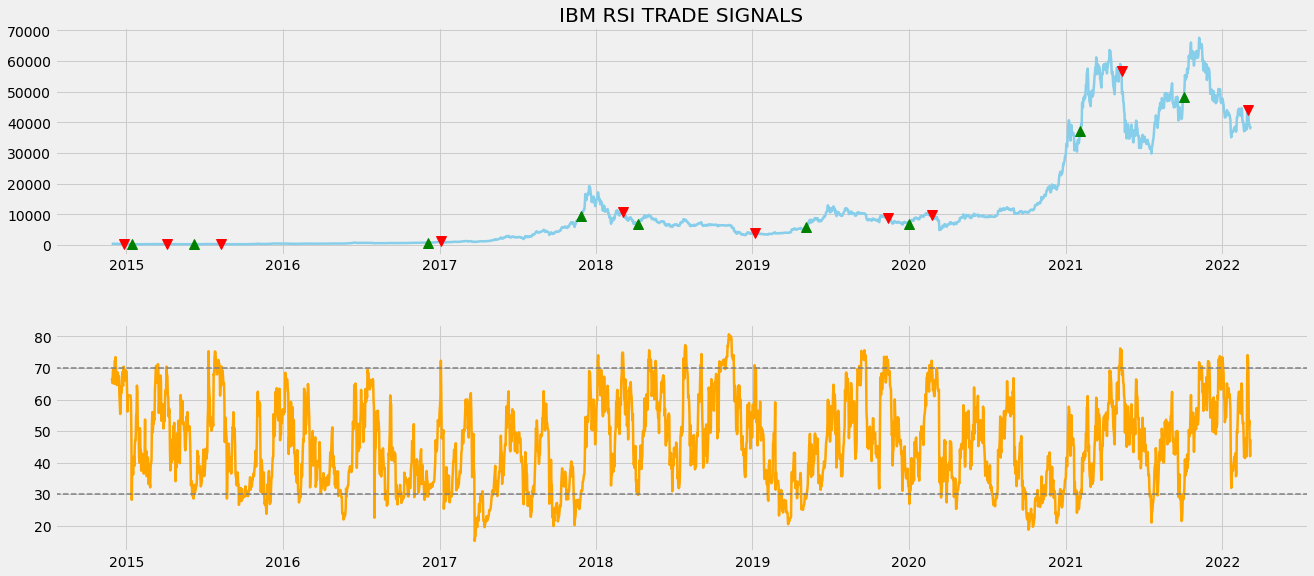

In [54]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)
ax1.plot(btc_df['close'], linewidth = 2.5, color = 'skyblue', label = 'IBM')
ax1.plot(btc_df.index, buy_price, marker = '^', markersize = 10, color = 'green', label = 'BUY SIGNAL')
ax1.plot(btc_df.index, sell_price, marker = 'v', markersize = 10, color = 'r', label = 'SELL SIGNAL')
ax1.set_title('IBM RSI TRADE SIGNALS')
ax2.plot(btc_df['rsi_14'], color = 'orange', linewidth = 2.5)
ax2.axhline(30, linestyle = '--', linewidth = 1.5, color = 'grey')
ax2.axhline(70, linestyle = '--', linewidth = 1.5, color = 'grey')
plt.show()